In [1]:
%matplotlib inline
import numpy as np
import os

import numpy as np
import matplotlib.pyplot as plt

import time
import scipy
from scipy.misc import imread
from scipy.misc import imresize
from scipy import fftpack
import glob
import cv2

In [2]:
img_folder = '/Users/cesar/Documents/CoxLab/Repos/scene_stimuli/Original'

img_list = glob.glob(os.path.join(img_folder,'*'))

In [3]:
im0 = imread(img_list[3])
im0 = np.mean(im0,2).squeeze()

(960, 1280)


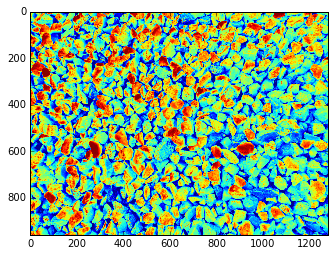

In [4]:
print(im0.shape)
plt.imshow(im0)


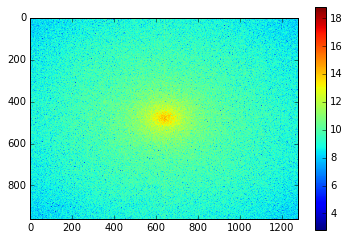

In [107]:
h1 = np.hamming(960)
h2 = np.hamming(1280)
ham2d = np.sqrt(np.outer(h1,h2))

fft0 = np.fft.fftshift(np.fft.fft2(im0))

plt.imshow(np.log(np.abs(fft0)))
plt.colorbar()

In [119]:
im1 = cv2.pyrDown(im0)
im1 = cv2.pyrDown(im1)
im1 = cv2.pyrDown(im1)
im1 = cv2.pyrDown(im1)

error: /Users/jenkins/miniconda/1/x64/conda-bld/work/opencv-3.1.0/modules/imgproc/src/pyramids.cpp:871: error: (-215) ssize.width > 0 && ssize.height > 0 && std::abs(dsize.width*2 - ssize.width) <= 2 && std::abs(dsize.height*2 - ssize.height) <= 2 in function pyrDown_


(480, 640)


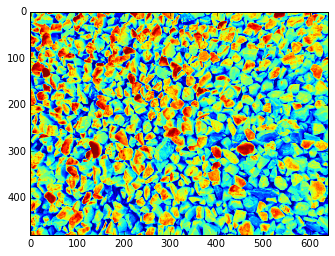

In [118]:
print(im1.shape)
plt.imshow(im1)

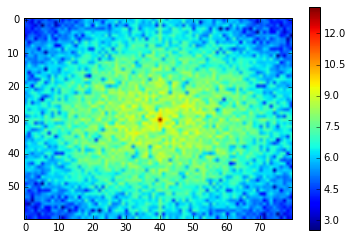

In [108]:
h1 = np.hamming(60)
h2 = np.hamming(80)
ham2d = np.sqrt(np.outer(h1,h2))

fft5 = np.fft.fftshift(np.fft.fft2(im1))

plt.imshow(np.log(np.abs(fft5)))
plt.colorbar()

In [53]:
im2 = cv2.pyrUp(im1)
im2 = cv2.pyrUp(im2)
im2 = cv2.pyrUp(im2)
im2 = cv2.pyrUp(im2)

(960, 1280)


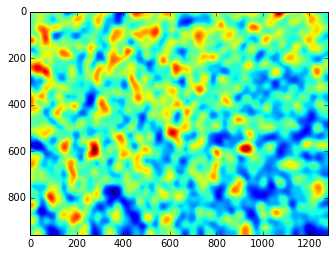

In [54]:
print(im2.shape)
plt.imshow(im2)

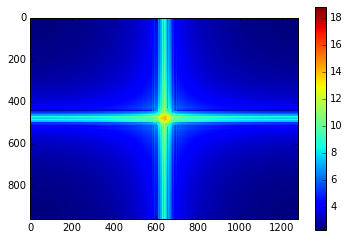

In [68]:
h1 = np.hamming(960)
h2 = np.hamming(1280)
ham2d = np.sqrt(np.outer(h1,h2))

fft1 = np.fft.fftshift(np.fft.fft2(im2))

plt.imshow(np.log(np.abs(fft1)))
plt.colorbar()

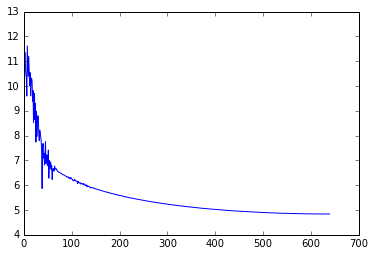

In [74]:
plt.plot(np.log(abs(fft1[450,640:])))

In [100]:

im1_alt = cv2.resize(im0,(80,60))

(60, 80)


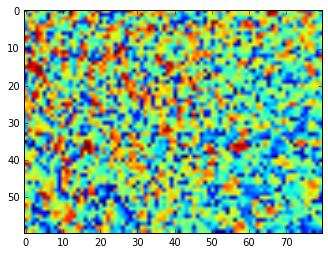

In [101]:
print(im1_alt.shape)
plt.imshow(im1_alt)

(960, 1280)


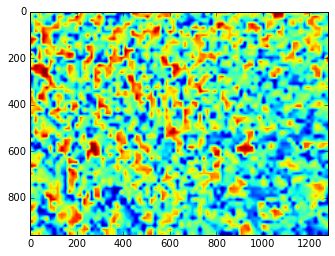

In [105]:
im2_alt = cv2.resize(im1_alt,(1280,960))
print(im2_alt.shape)
plt.imshow(im2_alt,)

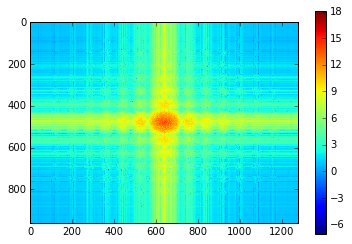

In [106]:
h1 = np.hamming(1280)
h2 = np.hamming(960)
ham2d = np.sqrt(np.outer(h2,h1))

fft2 = np.fft.fftshift(np.fft.fft2(im2_alt*ham2d))

plt.imshow(np.log(np.abs(fft2)))
plt.colorbar()

In [80]:
im1_alt2 = cv2.GaussianBlur(im0,(101,101),0)

(960, 1280)


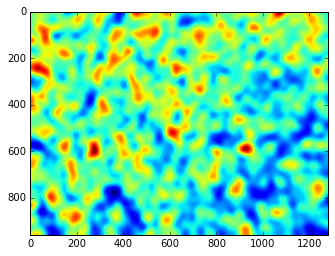

In [81]:
print(im1_alt2.shape)
plt.imshow(im1_alt2)

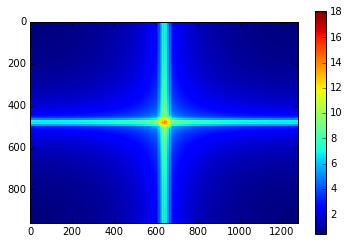

In [82]:
h1 = np.hamming(1280)
h2 = np.hamming(960)
ham2d = np.sqrt(np.outer(h2,h1))

fft3 = np.fft.fftshift(np.fft.fft2(im1_alt2*ham2d))

plt.imshow(np.log(np.abs(fft3)))
plt.colorbar()

In [94]:
im1_alt3 = block_mean(im0,4)

(240, 320)
ERROR! Session/line number was not unique in database. History logging moved to new session 572


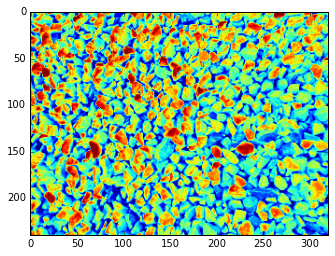

In [123]:
print(im1_alt3.shape)
plt.imshow(im1_alt3)

In [5]:
im1_alt4 = cv2.pyrUp(im0)
im1_alt4 = cv2.pyrUp(im1_alt4)


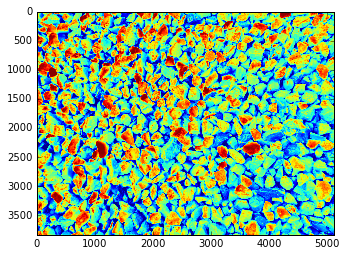

In [6]:
plt.imshow(im1_alt4)

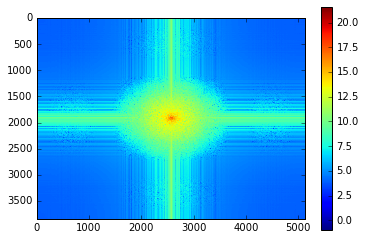

In [7]:
h1 = np.hamming(1280)
h2 = np.hamming(960)
ham2d = np.sqrt(np.outer(h2,h1))

fft4 = np.fft.fftshift(np.fft.fft2(im1_alt4))

plt.imshow(np.log(np.abs(fft4)))
plt.colorbar()

In [90]:
print(res.shape)

(903,)


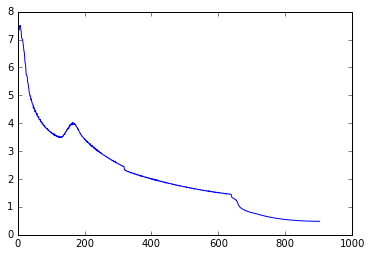

In [92]:
plt.plot(res)

In [93]:
from scipy import ndimage

def block_mean(ar, fact):
    assert isinstance(fact, int), type(fact)
    sx, sy = ar.shape
    X, Y = np.ogrid[0:sx, 0:sy]
    regions = sy/fact * (X/fact) + Y/fact
    res = ndimage.mean(ar, labels=regions, index=np.arange(regions.max() + 1))
    res.shape = (sx/fact, sy/fact)
    return res

In [84]:
def azimuthalAverage(image, center=None):
    """
    Calculate the azimuthally averaged radial profile.

    image - The 2D image
    center - The [x,y] pixel coordinates used as the center. The default is 
             None, which then uses the center of the image (including 
             fracitonal pixels).
    
    """
    # Calculate the indices from the image
    y, x = np.indices(image.shape)

    if not center:
        center = np.array([(x.max()-x.min())/2.0, (x.max()-x.min())/2.0])

    r = np.hypot(x - center[0], y - center[1])

    # Get sorted radii
    ind = np.argsort(r.flat)
    r_sorted = r.flat[ind]
    i_sorted = image.flat[ind]

    # Get the integer part of the radii (bin size = 1)
    r_int = r_sorted.astype(int)

    # Find all pixels that fall within each radial bin.
    deltar = r_int[1:] - r_int[:-1]  # Assumes all radii represented
    rind = np.where(deltar)[0]       # location of changed radius
    nr = rind[1:] - rind[:-1]        # number of radius bin
    
    # Cumulative sum to figure out sums for each radius bin
    csim = np.cumsum(i_sorted, dtype=float)
    tbin = csim[rind[1:]] - csim[rind[:-1]]

    radial_prof = tbin / nr

    return radial_prof


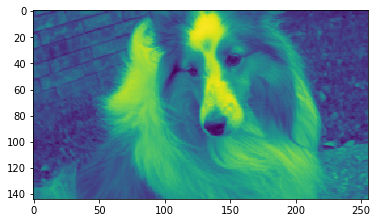

In [90]:
plt.imshow(im2[56:200,:])

In [89]:
128-72

56

In [8]:
img_folder = '/Users/cesar/Documents/CoxLab/stimuli/lowPass'
img_fn = '3.tif'

In [9]:
#want 256x448

In [29]:
768-1080

-312

In [30]:
1920-1024

896

In [31]:
896/2

448.0

(768, 1024)


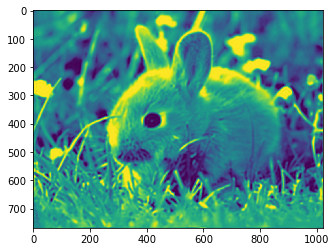

In [16]:
print(im0.shape)
plt.imshow(im0)

In [38]:
im2 = np.pad(im0,((156,156),(448,448)),'constant')

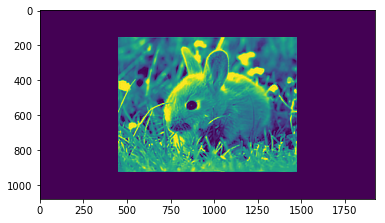

In [39]:
plt.imshow(im2)

In [17]:
im1= imresize(im0,((256,341)))

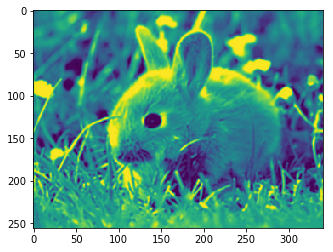

In [18]:
plt.imshow(im1)

In [28]:
scipy.misc.imsave('tmp.png',im1)

In [ ]:
#256x455